In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
import os

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'data')))

In [3]:
import data_utils as du

## 1. Preprocessing Images for Training
### Step 1.1: Standardize Input Sizes 
#### As most of videos has size 752x480 and YOLO mandates square dimensions then letterboxing was choosen to resize all images to 640x640

In [3]:
def preprocess_image(image, target_size=(640, 640)):
    """
    Preprocess an image by resizing and letterboxing to match the target size.

    Args:
        image (np.ndarray): Input image.
        target_size (tuple): Desired size (width, height).

    Returns:
        np.ndarray: Resized and letterboxed image.
    """
    target_width, target_height = target_size
    h, w = image.shape[:2]

    # Calculate the scaling factor
    scale = min(target_width / w, target_height / h)
    new_width, new_height = int(w * scale), int(h * scale)

    # Resize the image
    resized_image = cv2.resize(image, (new_width, new_height))

    # Calculate padding to fit the target size
    pad_top = (target_height - new_height) // 2
    pad_bottom = target_height - new_height - pad_top
    pad_left = (target_width - new_width) // 2
    pad_right = target_width - new_width - pad_left

    # Add padding
    letterboxed_image = cv2.copyMakeBorder(
        resized_image, pad_top, pad_bottom, pad_left, pad_right,
        cv2.BORDER_CONSTANT, value=(0, 0, 0)  # Black padding
    )

    return letterboxed_image


In [5]:
image = cv2.imread('../dataset/raw/Video_1/frame_000388.jpg')
image.shape

(480, 640, 3)

In [6]:
resized_image = preprocess_image(image)
resized_image.shape

(640, 640, 3)

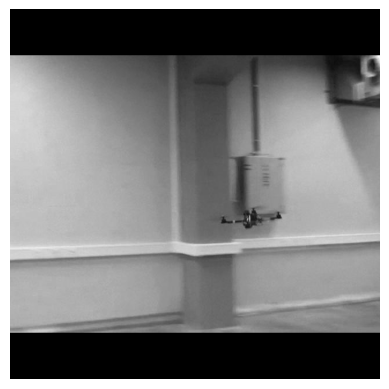

In [8]:
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [12]:
image = cv2.imread('../dataset/raw/Video_46/frame_000006.jpg')
image.shape

(480, 752, 3)

In [13]:
resized_image = preprocess_image(image)
resized_image.shape

(640, 640, 3)

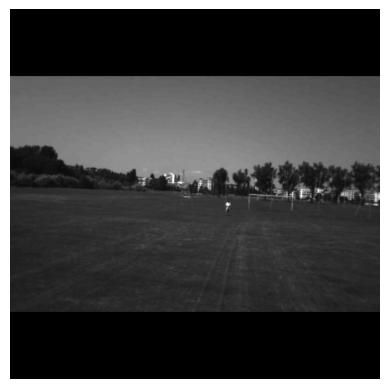

In [14]:
plt.imshow(resized_image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [4]:
annot = du.read_annotations('../dataset/annotations/FL-Drones-Dataset/Video_1.txt')
annot

{0: [(348, 339, 411, 366)],
 1: [(346, 339, 409, 366)],
 2: [(346, 340, 409, 367)],
 3: [(347, 341, 410, 368)],
 4: [(349, 341, 413, 368)],
 5: [(350, 342, 414, 369)],
 6: [(350, 342, 414, 369)],
 7: [(351, 341, 415, 368)],
 8: [(353, 340, 417, 367)],
 9: [(354, 338, 418, 365)],
 10: [(354, 335, 417, 362)],
 11: [(355, 333, 419, 360)],
 12: [(356, 330, 419, 357)],
 13: [(355, 325, 420, 353)],
 14: [(358, 322, 422, 349)],
 15: [(359, 319, 423, 346)],
 16: [(360, 316, 424, 343)],
 17: [(361, 314, 425, 341)],
 18: [(363, 311, 427, 338)],
 19: [(362, 310, 430, 335)],
 20: [(363, 307, 431, 332)],
 21: [(365, 304, 433, 329)],
 22: [(365, 302, 434, 327)],
 23: [(366, 300, 435, 326)],
 24: [(366, 298, 436, 324)],
 25: [(366, 296, 437, 322)],
 26: [(370, 295, 436, 319)],
 27: [(367, 291, 441, 318)],
 28: [(367, 289, 443, 317)],
 29: [(368, 287, 444, 315)],
 30: [(369, 285, 446, 313)],
 31: [(368, 282, 448, 311)],
 32: [(370, 280, 451, 309)],
 33: [(371, 278, 452, 307)],
 34: [(372, 276, 453, 30

In [5]:
files = du.read_files_in_order('../dataset/raw/Video_1')

In [6]:
files

['../dataset/raw/Video_1/frame_000000.jpg',
 '../dataset/raw/Video_1/frame_000001.jpg',
 '../dataset/raw/Video_1/frame_000002.jpg',
 '../dataset/raw/Video_1/frame_000003.jpg',
 '../dataset/raw/Video_1/frame_000004.jpg',
 '../dataset/raw/Video_1/frame_000005.jpg',
 '../dataset/raw/Video_1/frame_000006.jpg',
 '../dataset/raw/Video_1/frame_000007.jpg',
 '../dataset/raw/Video_1/frame_000008.jpg',
 '../dataset/raw/Video_1/frame_000009.jpg',
 '../dataset/raw/Video_1/frame_000010.jpg',
 '../dataset/raw/Video_1/frame_000011.jpg',
 '../dataset/raw/Video_1/frame_000012.jpg',
 '../dataset/raw/Video_1/frame_000013.jpg',
 '../dataset/raw/Video_1/frame_000014.jpg',
 '../dataset/raw/Video_1/frame_000015.jpg',
 '../dataset/raw/Video_1/frame_000016.jpg',
 '../dataset/raw/Video_1/frame_000017.jpg',
 '../dataset/raw/Video_1/frame_000018.jpg',
 '../dataset/raw/Video_1/frame_000019.jpg',
 '../dataset/raw/Video_1/frame_000020.jpg',
 '../dataset/raw/Video_1/frame_000021.jpg',
 '../dataset/raw/Video_1/frame_0

## Decided not to use letterboxing and crop images to 480x480 instead